# Deep Dive into  K-Means





# $\color{darkblue}{\mathbf{\text{ Table of Contents.}}}$


[**$\color{orange}{\mathbf{IN.}} \color{darkblue}{\mathbf{\underline{\text{ Introduction.}}}}$**](#introduction) 

[**$\color{orange}{\mathbf{NT.}} \color{darkblue}{\mathbf{\underline{\text{  K-means Clustering Intuition.}}}}$**](#intuition)

[**$\color{orange}{\mathbf{MF.}} \color{darkblue}{\mathbf{\underline{\text{ K-means Mathemathical Formulation.}}}}$**](#km_math)

&nbsp; &nbsp; &nbsp; &nbsp; [**$\color{orange}{\mathbf{MF.1.}} \color{darkblue}{\mathbf{\underline{\text{ Background and Pre-requisite.}}}}$**](#km_math_pre)


[**$\color{orange}{\mathbf{EX.}} \color{darkblue}{\mathbf{\underline{\text{ K-Means In Practice.}}}}$**](#uc)

&nbsp; &nbsp; &nbsp; &nbsp; [**$\color{orange}{\mathbf{EX.1.}} \color{darkblue}{\mathbf{\underline{\text{ Utilities Functions.}}}}$**](#uc_ut)

&nbsp; &nbsp; &nbsp; &nbsp; [**$\color{orange}{\mathbf{EX.2.}} \color{darkblue}{\mathbf{\underline{\text{ K-means Used Cases.}}}}$**](#uc_ex)

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; [**$\color{orange}{\mathbf{EX.2.1.}} \color{darkblue}{\mathbf{\underline{\text{ K-means Illustration on Toy Dataset.}}}}$**](#uc_ex1)


&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; [**$\color{orange}{\mathbf{EX.2.2.}} \color{darkblue}{\mathbf{\underline{\text{ K-means for Unsupervised Classification.}}}}$**](#uc_ex2)

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; [**$\color{orange}{\mathbf{EX.2.3.}} \color{darkblue}{\mathbf{\underline{\text{ K-means for Image Compression by Color Quantization.}}}}$**](#uc_ex3)

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; [**$\color{orange}{\mathbf{EX.2.4.}} \color{darkblue}{\mathbf{\underline{\text{ K-means for Background removal by Image Segmentation.}}}}$**](#uc_ex4)


[**$\color{orange}{\mathbf{SM.}} \color{darkblue}{\mathbf{\underline{\text{ Summary.}}}}$**](#summary)



# $\color{orange}{\mathbf{IN.}} \color{darkblue}{\mathbf{\text{ Introduction.}}}$<a name="introduction"></a>


In this Notebook, we will explore K-means Clustering from various perspectives.

We will first give a short intuitive explanation for k-means and why it makes sense. Then we will go deeper into the actual derivation of k-means using the EM techniques. Once we have understood the theory and concept, we will dive deeper into the use cases and examples. We will consider following scenarios with examples.

    1. K-means Illustrative Basic Example.
  
    2. K-means as Unsupervised Classifier.
  
    3. K-means for Image Compression by Color Quantization.
  
    4. K-means for Image Segmentation.

 
 

In the end, we will summarize our discussion with various pointers resources.




# $\color{orange}{\mathbf{NT.}} \color{darkblue}{\mathbf{\text{ KMeans Clustering Intuition.}}}$<a name="intuition"></a>


##### NT.1 Why KMeans naturally arises!

In real life, the data is generated from fixed degree of freedom and when we collect data, there are noise added or sometimes we don't know the actual dimensions . These all means that to represent a collection of data, we use a lot of memory for datasets. But since in real life , data is generated from a set of fixed categories meaning that there is bound to have some duplications of the data points and if we can only store a few representative points in each category, we can seperately analyse, each of the those category or cluster and gain deeper insights. For example, as a person, you would like to manage and categorize your expenses. You might spend money on turkey sandwich, chicken sandwitch, rent, car oil changes, car brake fixes etc. But technically, there are only 3 categories in above example i.e food expense, car expense, rent expense. Thus if we can somehow cluster the data set into more natural categories, we can get a lot more insights and better pruning for the datasets. 
This notebook will explore those areas.

##### NT.2. What is KMeans clustering.

Given a datasets, we usually build our models from the labelled datasets aka supervised learning techniques. On the other side, K-means clustering is an unsupervized learning techniques meaning, we don't need a labelled datasets. That way, we save efforts for labelling.

Later we will see that K-means is a special case of Guassian Mixture models and Expectation Maximization. 

For now, lets look at the steps involved in k-means. It is a simple algorithm to classify datasets into k clusters. 

1. Randomly assign k points as the potential centroid (similar to weighted center).
  (Note: We will see later what is the best way to assign the initial center)

2. Take each point in dataset and assign and associate it to the nearest centeroid.

3. Re-calculate the centroid with the points in the cluster.

4. Repeat steps 2-3, until the centroid locations changes very little from the previous iterations.


##### NT.3. Why is KMeans useful?


* Clustering algorithms with better features tend to be more expensive computationally compare to k-means and hence it is much faster in runtime.

* It is better for high dimensional data.

* Clusters have natural meanings and it is easy to implement.

* k-means is use as a pre-clustering algorithm reducing the space into smaller sub-spaces, were each smaller sub-spaces can be analysed.



##### NT.4 Intuition of K-means.

The intuition behind K-means clustering is remarkably simple. 

If we don't know the answers to how to make optimum k clusters, then we make our best guess i.e our best estimation by initializing the center of the clusters and we then go over the data points and then ask ourself, where does it belongs and we temporarily assign datapoint to one of he clusters. This is what we call expectation step. 

Now, we refine our clusters by recomputing the centroid of each cluster and this step is called maximization step.




# $\color{orange}{\mathbf{MF.}} \color{darkblue}{\mathbf{\text{ K-means Mathemathical Formulation.}}}$<a name="km_math"></a>

Now, lets derive the expression for k-means by rigourous mathemathical methods.


## $\color{orange}{\mathbf{MF.}} \color{darkblue}{\mathbf{\text{ Background and Pre-requisite.}}}$<a name="km_math_pre"></a>

Now we are ready to derive the expression for k-means.

As we talked about in the previous sections that data is generated from fixed number of sources and we know that in nature and real life if we have enough data points than their distribution will converge to guassian with some mean $\mu$ with standard deviation $\sigma$. In our case, since there are multiple sources and the final data would be the mixture of K guassian distributions. However at any instance of time, data is generated from one of the guassian distributions. Since k-means is the unsupervized tecniques, there won't be any levels i.e no $y_{i}$. So our data generation process is as follows. 


K-means is a special case of Gaussian mixture model (GMM), where the cluster membership is hard meaning that unlike in GMM, a point only belongs to one cluster instead of multiple clusters. Those membership in different cluster corresponds to weights or responsibility or probability of a sample belonging to $k$'th cluster. Since in k-means, a point belongs to only one cluster, we can modify our understanding of GMM to include following two assumptions:

1. A point only belongs to one cluster i.e hard assigment
2. the variance around the center of cluster is spherical rather than elliptical, meaning that covariance matrix is diagonal.

We would like user to refer to our treatment of [GMM here](https://github.com/aloknsingh/ds_deepdive_gmm/blob/master/notebooks/GMM.ipynb). Also we would recommend user to look at mathemathical background at companion notebook [AppliedMath](AppliedMath.ipynb).




Here is complete algorithm for [parameter estimation expression for GMM](https://github.com/aloknsingh/ds_deepdive_gmm/blob/master/notebooks/GMM.ipynb#gmm_train)


$$
\large
\color{black}{
\begin{align}
&\mathbf{Conventions:}\\
&\hspace{15pt} \text{;Lets use subscript to denote component count i.e $\large \mu_k$ is $\large k$'th component of $\large \mu$}\\
&\hspace{15pt} \text{;Lets use superscript to denote iteration count i.e.  $\large \mu^t$ is $\large \mu$ at iteration $\large t$}\\
&\mathbf{Variables:}\\
&\hspace{15pt} \text{;At $t$'th iteration, let parameters be denoted:}\\
&\hspace{35pt}\mathbf{\pi^t} = (\pi_1^t, \pi_2^t, \cdots, \pi_K^t) \\
&\hspace{35pt}\mathbf{\mu^t} = (\mathbf{\mu_1}^t, \mathbf{\mu_2}^t, \cdots, \mathbf{\mu_K}^t)\\
&\hspace{35pt}\mathbf{\Sigma^t} = (\mathbf{\Sigma_1}^t, \mathbf{\Sigma_2}^t, \cdots, \mathbf{\Sigma_K}^t)\\
&\hspace{15pt}\text{;At $t$'th iteration, let responsibility each of $K$ cluster be denoted:}\\
&\hspace{35pt}\mathbf{\gamma}^t_k = (\gamma^t_{1k}, \gamma^t_{1k},\cdots, \gamma^t_{Nk}) \text{ } \forall k \in (1 \cdots K)\\
&\hspace{35pt}\mathbf{\gamma}^t = (\mathbf{\gamma}^t_1, \mathbf{\gamma}^t_2, \cdots, \mathbf{\gamma}^t_K) \text{; $\mathbf{\gamma}^t$ is $K\times N$ matrix}\\
&\mathbf{Initialize:}\\
&\hspace{15pt} \forall k \in (1 \cdots K):\\
&\hspace{35pt} \mathbf{\gamma}^0_k = (\gamma^0_{1k}, \gamma^0_{1k},\cdots, \gamma^0_{Nk}) = \text{random_init()} \text{ }\\
&\hspace{15pt} \mathbf{\pi^0} = (\pi_1^0, \pi_2^0, \cdots, \pi_K^0) = \text{random_init()}\\
&\hspace{15pt} \mathbf{\mu^0} = (\mathbf{\mu_1}^0, \mathbf{\mu_2}^0, \cdots, \mathbf{\mu_K}^0) = \text{random_init()}\\
&\hspace{15pt} \mathbf{\Sigma^0} = (\mathbf{\Sigma_1}^0, \mathbf{\Sigma_2}^0, \cdots, \mathbf{\Sigma_K}^0) = \text{random_init()}\\
&\hspace{15pt} t = 0\\
&\mathbf{EM\ Iterations:}\\
&\hspace{15pt}\mathbf{Loop Until Convergence:}\\
&\hspace{30pt}\mathbf{E-Step:}\\
&\hspace{30pt}\hspace{15pt} \mathbf{\gamma^{t+1}} = expectation(\mathbf{X}, \mathbf{\pi^{t}}, \mathbf{\mu^t}, \mathbf{\Sigma^t})\\
&\hspace{30pt}\mathbf{M-Step:}\\
&\hspace{30pt}\hspace{15pt} (\mathbf{\pi^{t+1}}, \mathbf{\mu^{t+1}}, \mathbf{\Sigma^{t+1}}) = maximization(\mathbf{X}, \mathbf{\gamma^{t+1}})\\
&\hspace{30pt}  t = t+1 \\
&\hspace{30pt}  \text{} \\
&\mathbf{Function\ } expectation(\mathbf{X}, \mathbf{\pi}^t, \mathbf{\mu}^t, \mathbf{\Sigma}^t):\\
&\hspace{15pt}\text{for k in ($1 \cdots K$):}\\
&\hspace{30pt}\text{for i in ($1 \cdots N$):}\\
&\hspace{45pt}\gamma^{t+1}_{ik} = \frac{p^{t}_{\mathcal{N}}(\mathbf{x}_i|\mathbf{z}_i = z_{ik};\mathbf{\mu}, \mathbf{\Sigma}).p^{t}(\mathbf{z}_i = z_{ik};\mathbf{\pi},\mathbf{\mu}, \mathbf{\Sigma})}{\sum_{k=1}^{K}{p^{t}_{\mathcal{N}}(\mathbf{x}_i|\mathbf{z}_i = z_{ik};\mathbf{\mu}, \mathbf{\Sigma}).p^{t}(\mathbf{z}_i = z_{ik};\mathbf{\pi},\mathbf{\mu}, \mathbf{\Sigma})}} \text{; compute $(i,k)$ entry of matrix $\mathbf{\gamma}^{t+1}$}\\
&\hspace{15pt}\mathbf{\text{return }}\mathbf{\gamma}^{t+1}\\
&\hspace{15pt}\text{}\\
&\mathbf{Function\ } maximization(\mathbf{X}, \mathbf{\gamma}^{t+1},\mathbf{\pi}^t, \mathbf{\mu}^t, \mathbf{\Sigma}^t):\\
&\hspace{15pt}\text{for k in ($1 \cdots K$):}\\
&\hspace{30pt} {\pi}^{t+1}_k = \frac{\sum_{i=1}^{N}\mathbf{\gamma}^{t+1}_{ik}}{N}\\
&\hspace{30pt} \mathbf{\mu}^{t+1}_k = \frac{\sum_{i=1}^{N}\mathbf{\gamma}^{t+1}_{ik}\mathbf{x}_i}{\sum_{i=1}^{N}\mathbf{\gamma}^{t+1}_{ik}} \\
&\hspace{30pt} \Sigma^{t+1}_k = \frac{\sum_{i=1}^{N}\mathbf{\gamma}^{t+1}_{ik}(\mathbf{x}_i - \mathbf{\mu}^{t}_k)^T(\mathbf{x}_i - \mathbf{\mu}^{t}_k)}{\sum_{i=1}^{N}\mathbf{\gamma}^{t+1}_{ik}} \\
&\hspace{15pt}\text{}\\
\end{align}
}
$$


In k-means each of $K$ clusters are spherical and hence covariance matrix should be diagonal and each entry must be same and hence covariance matrix reduces to single entry and we don't need to estimate it.

Similarly, in k-means responsibility of each cluster to point $i$ is hard meaning a point either belongs to a cluster or not . Since responsibility $\gamma^t_{ik} \in {0,1}$ rather than any real number between 0 and 1, we intuitively know that we might be able to simplify it. Also mixing proportion $\pi_k$ for $k$'th cluster is just average of responsibility of all of points in $k$'th cluster. Since  $\gamma^t_{ik}$ is discreet, the values of $\pi_k$ can just be found using proportion of points in the cluster $k$. In this way, we are only left with the computation of $\mathbf{\mu}_k$ which is just the center estimate. 


Now we have established that, we would only need to compute simple version of responsibility and only $\mathbf{\mu}_k$


# $\color{orange}{\mathbf{EX.}} \color{darkblue}{\mathbf{\text{ K-means in Practice.}}}$<a name="uc"></a>


We have seen, intuition and mathemathical formulation of Kmeans. Now it's time to play around with real dataset to get more insights and practical application. We will be using [Scikit-learn](http://scikit-learn.org/stable/) and [matplotlib](https://matplotlib.org/) to dive deep into examples



Lets load relevant library.

## $\color{orange}{\mathbf{EX.1}} \color{darkblue}{\mathbf{\text{ Utilities Functions.}}}$<a name="uc_ut"></a>

Lets load relevant library.


In [2]:
# to make sure that notebooks are plotting 
%matplotlib notebook

In [3]:


import time

# load high performance linalg lib
import numpy as np

import scipy as sp

import sklearn 

# pandas util
import pandas as pd

# load PCA
from sklearn.decomposition import  PCA, KernelPCA
from sklearn.cluster import KMeans

from sklearn import preprocessing

# load util for datasets
from sklearn import datasets

# load StandardScalar i.e shift by mean and scale by standard deviation
from sklearn.preprocessing import StandardScaler


# for visualization
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


from scipy.ndimage.filters import gaussian_filter
import matplotlib.pyplot as plt
from skimage.data import coins
from skimage.transform import rescale

from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

from sklearn.metrics.pairwise import euclidean_distances

from sklearn.feature_extraction import image
from sklearn.datasets import load_sample_image
from sklearn.metrics import accuracy_score

# mvn
from scipy.stats import multivariate_normal as mvn



#animation
from matplotlib import animation

from mpl_toolkits.mplot3d import Axes3D


from matplotlib import colors




##### $\color{orange}{\mathbf{EX.1.1}} \color{darkblue}{\mathbf{\text{ Utilities for Image Processing.}}}$


Lets develop multiple image processing utilities. This will be used multiple times in subsequence sections

###### Normalize Image
  
  Many scikit learn algorithms works on the image which are each pixel is in the range of 0-255. This utility
  allow one to normalize any image into the range.
  
  
######   Scale Down Image

  Since this document is the tutorial, we would like our code to execute in a reasonable time and this utility allow one  to scale down image so that subsequent image procesing runs faster.
  
  
##### Plot multiple images 

  Since plotting multiple images is a repetative task, this utils take care of it.
  

In [4]:

class ImageUtils(object):
    
    @staticmethod
    def normalize(image):   
        # make sure that image pixel is in the range 0-255 ( a normal level for each pixel)
        """ 
        Convert to floats instead of the default 8 bits integer coding. Dividing by
        255 is important so that plt.imshow behaves works well on float data (need to
        be in the range [0-1])
        """
        norm_image= np.array(image, dtype=np.float64) / 255
        return norm_image   

    @staticmethod
    def scaledown(image, size_pct = 0.2, sigma = 2):    
        """
        Resize it to size_pct of the original size to speed up the processing
        Applying a Gaussian filter for smoothing prior to down-scaling
        reduces aliasing artifacts.
        """
        smoothed_image = gaussian_filter(image, sigma)
        rescaled_smooth_image = rescale(smoothed_image, size_pct, mode="reflect")
        return rescaled_smooth_image

    
    
    def dimensions(im):
        """
        In Scikit-learn images can be a tuple of 2d array i.e black and white or 
        3d array i.e rgb image.This utils returns dimensions of image
        """
        w,h,d = (None, None, None)
        if len(im.shape) == 2:
            w,h = im.shape
        else:
            w,h,d = im.shape
        return (w,h,d)    
 
    def image_to_npimage(im, dims):
        """
        Convert, raw image into numpy 2d array to be used in processing 
        """
        im_2d = None
        w,h,d = dims
        #print("w,h,d=",w,h,d)
        if d:
            im_2d = im.reshape((w*h, d))
        else:
            im_2d = im.reshape((w*h, 1))
        return im_2d


    def npimage_to_image(arr, dims):
        "Convert 2d numpy image to standard image"
        im = None
        w,h,d = dims
        #print("w,h,d=",w,h,d)
        if d:
            im = arr.reshape(w, h, d)
        else:
            im = arr.reshape(w, h)
        return im



    @staticmethod
    def plot(image_infos, ncols=1, nrows=None, width=None, height=None, cmap=None):
        """
        Plot multiple images in nrows X ncols grid.
        @image_infos: an array of image_info. size of array is nrows X ncols
                 image_info: a dictionary of following
                     image: 2D or 3D numpy array  representing images
                     title: title of image
        It returns nrows X ncols numpy array of axes corresponding to each image
        """
        import math
    
        image_infos = image_infos if isinstance(image_infos, (list,)) else  [image_infos]
        num_images = len(image_infos)
        nrows = math.ceil(num_images/ncols) if not nrows else nrows
        figsize = (width, height) if width and height else None
        fig, axndarr = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, squeeze=False)
    
        #fig, axarr = plt.subplots(nrows=nrows, ncols=ncols, figsize=(width, height))
        axarru = axndarr.ravel()
        #print("nrows,ncols=", nrows, ncols)
        for y in range(nrows):
            for x in range(ncols):
            
                idx = x+y*ncols
                #print("x, y, idx, len ", x, y, idx, len(image_infos))
                ax = axarru[idx]
                #print(axarru)
                ax.set_xticks([])
                ax.set_yticks([])
                ax.grid(False)
                if idx >= len(image_infos):
                    continue
                ax = axarru[idx]
                image_info = image_infos[idx]
            
                title = image_info['title'] if 'title' in image_info else ""
                image = image_info['image'] if 'image' in image_info else None
                if cmap:
                    ax.imshow(image, cmap)
                else:
                    ax.imshow(image)
                ax.set_title(title)
          
            
        plt.show()
        return axndarr

    
class ImageUtils_Test(object): 
    @staticmethod
    def test_all():
        ImageUtils_Test.test_plot()
        
    @staticmethod
    def test_plot():
        
        test_plot_images = False # change to test for testing
        if test_plot_images:
            im=load_sample_image("china.jpg")    
            ImageUtils.plot( ncols=2, width=10, height=10,
                        image_infos=[
                                    {'image':im, 'title':'China Building'}, 
                                    {'image':im},
                                    {'image':im}, 
                                    {'image':im},
                                    {'image':im}, 
                                    {'image':np.empty(shape=(400,500))}
                               ])

            ImageUtils.plot(nrows=1, ncols=1, width=5, height=5,
                        image_infos={'image':im, 'title':'China Building'}, 
                        )

            ImageUtils.plot({'image':im, 'title':'China Building'}, )
            
   
        
#ImageUtils_Test.test_all()            


##### $\color{orange}{\mathbf{EX.1.2}} \color{darkblue}{\mathbf{\text{ Utilities for Plotting 3D.}}}$

We create convenient utility for plotting 3d data.


###### Surface data creation.

Since most of the 3d plot in matplotlib is conveniently done using the meshgrid. Given the function for z, this utility provides a way to create the 3d numpy array for meshgrid.

###### Surface

Convenient utility for ploting 3d meshgrid data. 


In [5]:
class PlotUtils(object):
    
    @staticmethod    
    def create_surface_data(xy_box, z_calc):
        

        x_min = xy_box['x_min']
        x_max = xy_box['x_max']
        y_min = xy_box['y_min']
        y_max = xy_box['y_max']
        
        x_cnt = (x_max-x_min)*10
        y_cnt = (y_max-y_min)*10
        
        #x, y = np.mgrid[x_min:x_max:30j, y_min:y_max:30j]
        
        xv = np.linspace(x_min, x_max, x_cnt)
        yv = np.linspace(y_min, y_max, y_cnt)
        x,y = np.meshgrid(xv,yv)
        
        xy = np.column_stack([x.flat, y.flat])
        z = z_calc(xy)
        z = z.reshape(x.shape)
        return (x, y, z)

    @staticmethod
    def surface(axis, x, y, z, **kwargs):
        print(type(kwargs))
        assert(x.shape[0] == y.shape[0])
        assert(x.shape[1] == y.shape[1])
        assert(x.shape[0] == z.shape[0])
        assert(x.shape[1] == z.shape[1])

        print(kwargs)
        return axis.plot_surface(x,y,z, **kwargs)
        

        
    
class PlotUtils_Test(object): 
    @staticmethod
    def test_all():
        PlotUtils_Test.test_surface()
        
    @staticmethod
    def test_surface():
        
        do_test = True # change to test for testing
        if not do_test:
            return
        
        mu = np.array([0.0, 0.0])

        sigma = np.array([.5, 1.0])
        covariance = np.diag(sigma**2)

        def mvn_pdf(xy):
            return mvn.pdf(xy, mean=mu, cov=covariance)

        #x,y,z = PlotUtils.create_surface_data(
        #            {'x_min': -3, 'x_max': 3, 'y_min': -3, 'y_max': 3},
        #            lambda xy: mvn.pdf(xy, mean=mu, cov=covariance)
        #        )    

        x,y,z = PlotUtils.create_surface_data(
            {'x_min': -3, 'x_max': 3, 'y_min': -3, 'y_max': 3},mvn_pdf
        )  
            
        (width, height) = (7,5)
        figsize = (width, height) if width and height else None
        fig = plt.figure(3, figsize=figsize)
        ax = fig.add_subplot(1,1,1, projection='3d')
        PlotUtils.surface(ax,x,y,z,rstride=1, cstride=1, 
                            cmap="hot",
                            edgecolor='none',alpha=0.99)   
        #ax.plot_surface(x,y,z, rstride=1, cstride=1, 
        #                    edgecolor='none',alpha=0.99, cmap="hot")
       
    
        plt.show()

        
#PlotUtils_Test.test_all()  


## $\color{orange}{\mathbf{EX.2}} \color{darkblue}{\mathbf{\text{ K-means Used Cases.}}}$<a name="uc_ex"></a>

In clustering, one of the key problems to consider is number of cluster to use.
We usually one of followings:

1. Rule of Thumb: use $\color{darkgreen}{number\_of\_cluster = \sqrt(number\_of\_datapoints)}$

2. [Silhouette Analysis]((http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html): You plot number of points distant in each cluster and see visual analysis to find optimum number of clusters.

We will consider following use cases.
* **K-means Illustrative Basic Example.**
  
  To get the feel of what k-means is lets first classify the simple example and analyse it.
  
  
* **K-means as Unsupervised Classifier.**
  
  Since k-means is unsupervised techniques, and it has a ability to make K number of clusters, we will illustrate a case of unsupervised classification of digits. 
  
  
  
* **K-means for Image Compression by Color Quantization.**
  
  Human eyes can't see in details all the 16 million colors and hence even if we reasonably remove certain colors, our image quality is be about same but achieving compression.
  
  
* **K-means for Background removal by Image Segmentation.**

 In Machine Learning, many times, we need to remove background from the main image. Usually background being darker color. Typically for ML tasks, we segment images into two segments to have picture of interests. Here we illustrates the idea with 2 clusters and removing background.
 
 
 
 
 Lets Look them in details with code:
 

### $\color{orange}{\mathbf{EX.2.1}} \color{darkblue}{\mathbf{\text{ K-means Illustration on Toy Dataset.}}}$<a name="uc_ex1"></a>


Lets see how k-means clustering can cluster our dataset. We will generate a toy dataset using scikit's make_blobs functionality with three centers. Then we will  cluster using k-means estimator and plot the result to view clustering. This is just a toy example for user to get a feel of clustering.


<IPython.core.display.Javascript object>


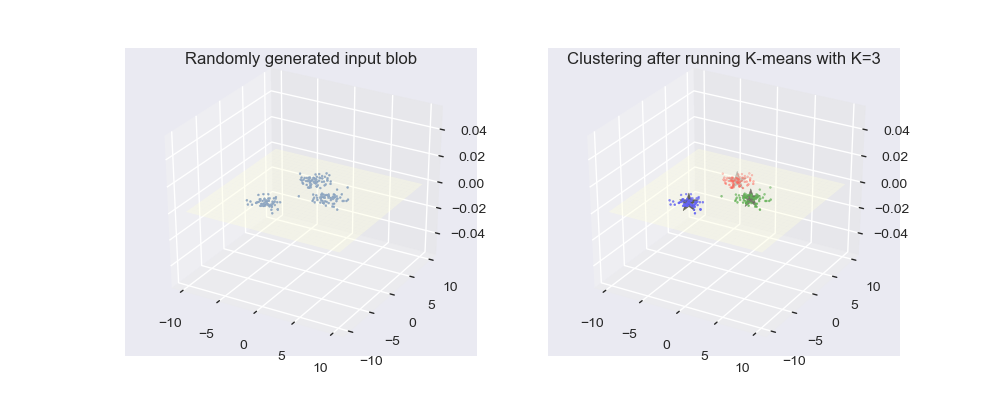

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy import stats as sp_stats
from matplotlib import colors


# figure's properties
width=10
height=4
fig = plt.figure(figsize=(width, height))

# Creating a sample dataset with 3 clusters
X, z = make_blobs(n_samples=200, n_features=2, centers=3, random_state=42, center_box=(-5,5))

x, y = (X[:, 0], X[:, 1])

# we will project x,y,z onto z = 0 plane for easy visualization
kde = sp_stats.gaussian_kde(X.T)
xx, yy = np.mgrid[-10:10:30j, -10:10:30j]
density = kde(np.c_[xx.flat, yy.flat].T).reshape(xx.shape)
zz = np.zeros(shape=xx.shape)
#print(density)
ax1 = fig.add_subplot(1, 2, 1, projection='3d')

ax1.plot_surface(xx,yy,zz, rstride=1, cstride=1, cmap=colors.ListedColormap(['lightyellow']),
                 edgecolor='none', alpha=0.4)
ax1.scatter(x, y, cmap=colors.ListedColormap(['black']), alpha=1, s=2)
ax1.set_title("Randomly generated input blob")

# Initializing KMeans
kmeans = KMeans(n_clusters=3)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

# plot the horizaontal surface.

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(xx,yy,zz, rstride=1, cstride=1, cmap=colors.ListedColormap(['lightyellow']),
                 edgecolor='none', alpha=0.4)

# plot three clusters with different color
ax2.scatter(x, y,  c=z, cmap=colors.ListedColormap(['red', 'green', 'blue']), s=2)
ax2.scatter(C[:, 0], C[:, 1], marker='*', c='black', s=200)
ax2.set_title("Clustering after running K-means with K=3")
plt.show()



## $\color{orange}{\mathbf{EX.2.2}} \color{darkblue}{\mathbf{\text{ K-means for Unsupervised Classification}}}$<a name="uc_ex2"></a>


Classification in short is similar to clustering in the sense that in both cases, we have to put samples into buckets. Each bucket corresponds to either a class or a cluster. The only difference is that in classification we know in advance, how many cluster will be there.

They do differs in the following area:

1. In classification, we know number of classes but in clustering, we don't know and we have to make estimate of it.
2. In classification, we  have labelled dataset, but in clustering, we don't


Due to their similarity, it makes sense that we can use clustering for unsupervised classification.

We will use digit dataset and run standard k-means algorithms. 

We must note that since kmean can assign the cluster randomly i.e cluster called 5 may belongs to digit label 3. Hence we have a method to convert it to the labels of target digits.We use the idea that clustering algorithms must have done   a good enough job to combine similar digit in a cluster and hence mode (i.e maximum occuring elements) is actually can be the real label of cluster. Also, since dataset is not labelled, we labels may not co-inside with actual number but they will all be in different cluster. Thus, it illustrate the important application of k-means clustering for unsupervised classification. 

**Note**:
In case of unlabelled data, we can use this technique to perform initial levels before running standard classifiers like logistic regression or support vector machine etc.


Accuracy of KMeans based classification =  0.79020589872


<IPython.core.display.Javascript object>


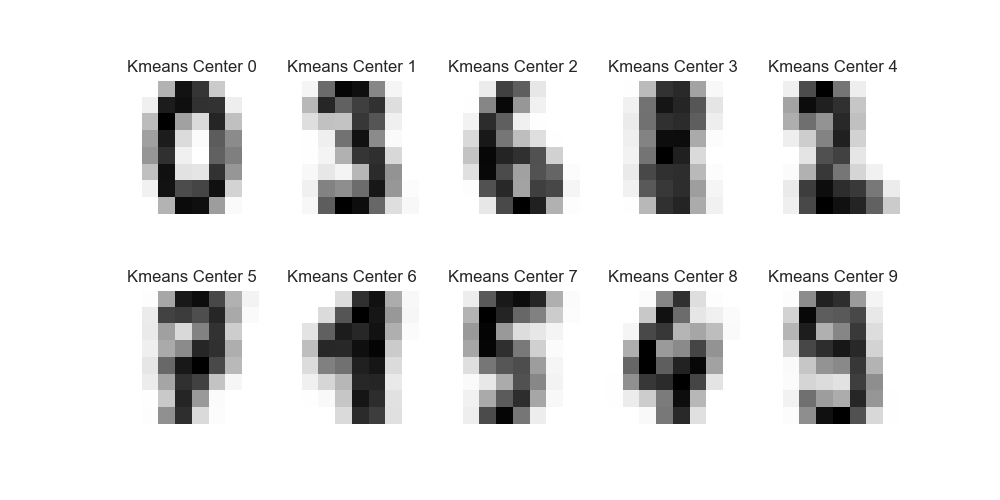

In [8]:
from scipy.stats import mode

def kmeans_classification(data, K=10):
    """
    Clustering code.
    """
    estimator = KMeans(n_clusters=K)
    estimator.fit(digits.data)
    digit_clusters = estimator.predict(digits.data)
    return dict(kmeans=estimator, clusters=digit_clusters)

def map2labels(pred_cluster_ids, actual_labels):
    """
    Since kmean can assign the cluster randomly i.e cluster called 5 may 
    belongs to digit label 3.Hence we have this util to convert it to the 
    labels of target digits.We use the idea that kmean cluster must have done
    a good enough job to combine similar digit in a cluster and hence mode 
    (i.e maximum occuring elements) is actually can be the real label of cluster
    """
    # find the unique clusters
    unq_clusters = np.unique(actual_labels).tolist()
    num_clusters = len(unq_clusters)
    
    # this is new labels
    labels = [0]*len(pred_cluster_ids)
    # map from predicted cluster label to actual label
    pcid2al = {}
    for cid in range(num_clusters):
        locs = [] # this will store the row id of the data
        sp_cid = 0
        for idx, p_cid in enumerate(pred_cluster_ids):
            if p_cid == cid:
                locs.append(idx)
                sp_cid = p_cid
         
        # find the histogram of actual label corresponding to the locations
        # of interest
        hist = [0]*num_clusters
        for loc in locs:
            actual_label = actual_labels[loc]
            hist[actual_label] =  hist[actual_label]+1
        # since kmean will do reasonable job, lets find maximum occuring label    
        max_occuring_label = hist.index(max(hist))  
        pcid2al[cid] = max_occuring_label
        #print("cid, maxlabel=",cid,sp_cid, max_occuring_label )
        # assign it to all the available location
        for loc in locs:
            labels[loc] =  max_occuring_label
            
    return dict(cid2labels=pcid2al, labels=np.array(labels))        

def eval_classification(target_real_labels, target_pred_labels):  
    """
    Simple evaluation using accuracy. In production system, user may
    want to use advanced techniques like smote algorithms or confusion matrix.
    """
    accuracy=accuracy_score(target_real_labels, target_pred_labels)
    print("Accuracy of KMeans based classification = ", accuracy)
    

# load digits and run clustering
digits = datasets.load_digits()
kmeans_cls_infos = kmeans_classification(digits.data)

kmeans_est = kmeans_cls_infos['kmeans'] # kmean object for query
digits_clusters_labels = kmeans_cls_infos['clusters'] # labels 

# as explained, we use mode to represent membership elements.
target_real_labels = digits.target
# we relabel it.
target_pred_labels_info = map2labels(digits_clusters_labels, target_real_labels)
target_pred_labels = target_pred_labels_info['labels']
center_pred_labels = target_pred_labels_info['cid2labels']
eval_classification(target_real_labels, target_pred_labels)

# get the image of the centers
# i.e it is 8x8 image and there are 10 digits.
centers = kmeans_est.cluster_centers_.reshape(10, 8, 8)

image_infos = []
for cid, center in enumerate(centers):
    image_info = {
                'image':center,
                'title': 'Kmeans Center %d' %(cid)
            }
    image_infos.append(image_info)
        
        
axarr = ImageUtils.plot(cmap=plt.cm.binary, ncols=5, width=10, height=5, 
                        image_infos=image_infos)



**Note**:

We can see that each of the cluster are different and we have just achieved classification of dataset without any labels!

## $\color{orange}{\mathbf{EX.2.3}} \color{darkblue}{\mathbf{\text{ K-means for Image Compression by Color Quantization.}}}$<a name="uc_ex3"></a>


Black and white images are represent by $width \times height$ arrays. For color images, we use $width \times height \times 3$. Note that we add another dimensions to represent color. However, since each color can range from $0-255$ i.e $2^8 level$, we can get a lot of colors. Typically, an image might contains 16 million colors. 


Since human eyes can't distinguish between so many variants or shades or color, even if we reduce the number of colors, we will still be able to get a good enough image for it to be useful and appealling.

To achieve this compression, we will use is clustering to find centers of each of the different colors and then replace all the colors in a cluster $k$ by the color represented by center of $k$'th cluster.

We will use flower image from scikit-learn datasets. 


<IPython.core.display.Javascript object>


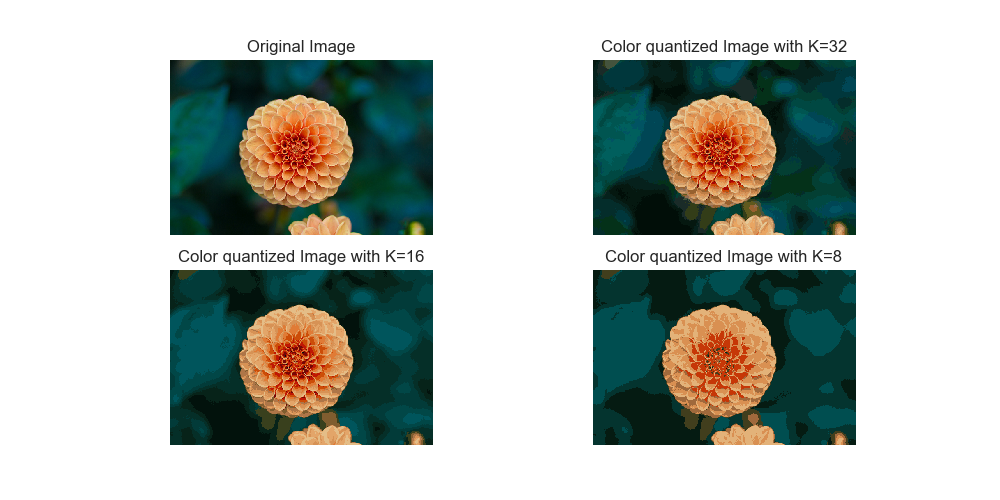

In [9]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time



def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image


def kmeans_colors_quantization(im, K = 10):
    """
    all the clustering code and replacing each pixel color with color of 
    it's center
    """
    
    (w, h, d) = im_dims = ImageUtils.dimensions(im)
    im_2d = ImageUtils.image_to_npimage(im, im_dims) 

    t0 = time()
    # Since we would like to run our algorithm faster 
    im_2d_sample = shuffle(im_2d, random_state=0)[:1000]
    estimator = KMeans(n_clusters=K, random_state=0).fit(im_2d_sample)
    t1 = time()
    im_labels = estimator.predict(im_2d)
    t2 = time()
    im_centers = estimator.cluster_centers_
    im_quant = recreate_image(im_centers, im_labels, w, h)
    return dict(image=im_quant, kmeans=estimator, labels=im_labels)
    
    
def demo_kmeans_colors_quantization(im_org):
    """
    clustering, re-labelling and plotting
    """
    im_norm = ImageUtils.normalize(im_org)
    
    image_infos = [
        {'image':im_norm, 'title':'Original Image'},
    ]
    n_colors = [32, 16, 8]
    for n_color in n_colors:
        kmean_quant = kmeans_colors_quantization(im_norm, K=n_color)
        im_compress = kmean_quant['image']
        im_labels = kmean_quant['labels']
        
        (w, h, d) = im_dims = ImageUtils.dimensions(im_org)
        image_info = {
            'image':im_compress,
            'title': 'Color quantized Image with K=%d' %(n_color)
        }
        image_infos.append(image_info)
        
    #cmap=plt.cm.gray
    axarr = ImageUtils.plot(cmap=None, ncols=2, width=10, height=5, 
                        image_infos=image_infos)


im_flower = load_sample_image("flower.jpg")

for im_org in (im_flower, ):    
    demo_kmeans_colors_quantization(im_org)
    
    

**Note**:
As we can see that original image being 16 million colors and we did experiments with color quantization $k$ to 8, 16 and 32 . Only with $k=8$, we see some differences. 

## $\color{orange}{\mathbf{EX.2.4}} \color{darkblue}{\mathbf{\text{ K-means for Background removal by Image Segmentation.}}}$<a name="uc_ex4"></a>

In in most of the datasets, we have a lot of information which is of no important for machine learning 
algorithm. So it makes sense to remove those unnecessary information. For instance, consider image dataset, where you would like to detect an object for example football or coin  in a picture taken with grass background.
Obvious we can create a classifier to do that. However, we could have a lot of unnecessary background object, which has a potential to introduce noise in the process of football detection. To avoid that it would make sense to remove
unnecessary background object. 

Here, we will illustrate one example of removing background using segmentation.

Here is flow:

1. Convert image into black and white to simplify computation.

2. Run clustering algorithm to cluster into two cluster.

3. One of the cluster will be our object of interest and other will be background. 


Just for analyse purposes, we will also run k-means clustering for more than two cluster.



Once clustering is done, we will plot it with orignal image and also with segmented object with marker drawn around the object of interest.


We will first consider a image containing a set of coins and we would like to detect those objects, since we know that 
there are only one kinds of object. But above techniques can be extended to multiple object too.



In [11]:


import time

def kmeans_segmentation(im, K = 10):
    """
    two center clusting kmean.
    """

    im_dims = ImageUtils.dimensions(im)
    im_2d = ImageUtils.image_to_npimage(im, im_dims) 


    t0 = time.time()
    estimator = KMeans(n_clusters=K, random_state=42)
    estimator.fit(im_2d)
    labels = estimator.predict(im_2d)
    t1 = time.time()
    labels = estimator.labels_
    centers = estimator.cluster_centers_
    seg_im_2d = centers[labels]
    seg_im = ImageUtils.npimage_to_image(seg_im_2d, im_dims)

    return dict(image=seg_im, kmeans=estimator, labels=labels)
    

def demo_kmeans_segmentation(im_org, num_segs=[2]):
    """
    clustering, remarking image, plot
    """
    im_norm = ImageUtils.normalize(im_org)
    
    # scale down image using gaussian filter for better results.
    im_norm_scale = ImageUtils.scaledown(im_norm)


    
    seg2kseg = {}
    # both original and processed (normalized, scaled down) image
    image_infos=[
        {'image':im_org, 'title':'Original Image'},
        {'image':im_norm_scale, 'title':'Normalized Scaled Image'},
    ]    
    #both original 
    image_infos=[
        {'image':im_org, 'title':'Original Image'},
    ]  
    for num_seg in (num_segs):
        ksegments = kmeans_segmentation(im_norm_scale, K = num_seg)  
        im_seg = ksegments['image']
        kmeans_seg = ksegments['kmeans']
        labels = ksegments['labels']
        seg2kseg[num_seg] = ksegments
        image_info = {
            'image':im_seg,
            'title': 'Segmented Image with K=%d' %(num_seg)
        }
        image_infos.append(image_info)
        
    cmap=plt.cm.gray
    axarr = ImageUtils.plot(cmap=cmap, ncols=2, width=8, height=4, 
                        image_infos=image_infos)
    
    num_axarr = len(axarr)
    axarru = axarr.ravel()
    
    # add contours to images.
    cnt = 0
    for num_seg, ksegments  in seg2kseg.items():
        ksegments = seg2kseg[num_seg]
        labels = ksegments['labels']
        labels2 = labels.reshape(im_norm_scale.shape[0], im_norm_scale.shape[1])
        
        #BEGIN DEBUG
        #print("labels2=", labels2.tolist())
        #print("im_org=",im_org.shape)
        #print("im_norm=",im_norm.shape)
        #print("labels2 shape=", labels2.shape)
        #print("im_norm_scale=", im_norm_scale.shape)
        #print("cnt=", cnt, axarru.shape)
        seg_ax = axarru[num_axarr+cnt]
        
        for l in range(num_seg):
            seg_ax.contour(labels2 == l,
                       colors=[plt.cm.nipy_spectral(l / float(num_seg))])
        #print(labels.shape)
        cnt = cnt+1
    
    
    


<IPython.core.display.Javascript object>


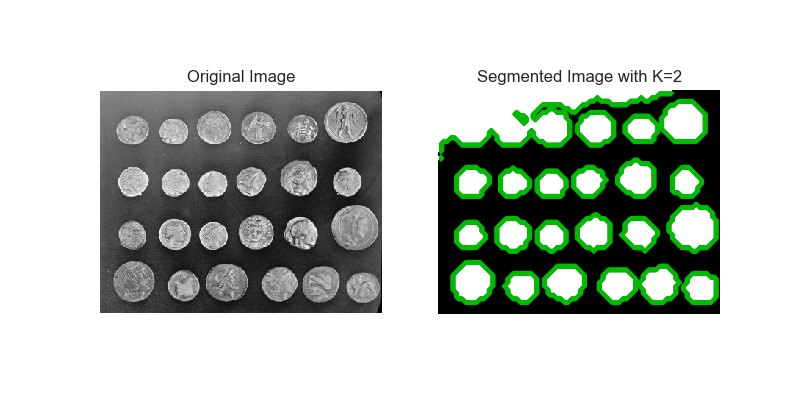

In [13]:
# load the coins as a numpy array
im_coins = coins()
demo_kmeans_segmentation(im_coins, [2])

#im_china = load_sample_image("china.jpg")

#ims_org = [im_coins, im_china]
#ims_org = [im_china]
#ims_org = [im_coins]

#for im_org in ims_org: 
#    demo_kmeans_segmentation(im_org, [2])


**Note**:

 1. We were able to detect the boundaries of coin and we can also extract it out and then we can run object detection.
 2. And then we can run object detection.(those object could be mixture i.e coins and small circular toys etc.
 
 
 Thus, we see that we can extract, the objects and removed background image. 
 
 We can also remove background from color image. The reason it works is because of our filtering in the step scaled_down_image which converts it into black and white image.
 
Next, we run same algorithm on a colored image "china.jpg". We can see that we were able to remove background i.e river and sky. Note that there are trees in the removed background. Since the color and contrast of trees matches building. 

<IPython.core.display.Javascript object>


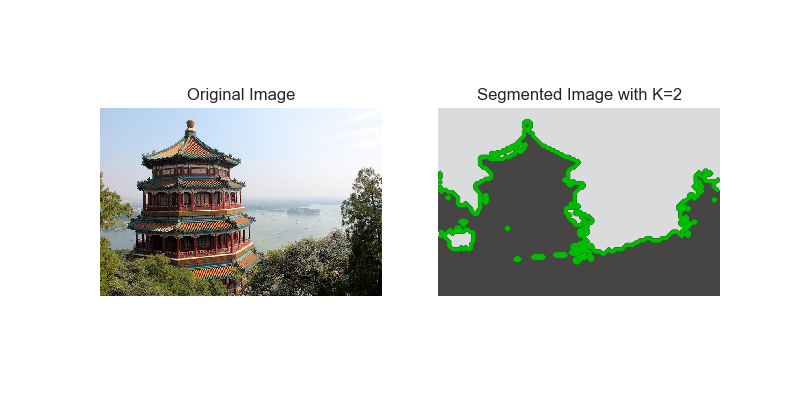

In [24]:

im_china = load_sample_image("china.jpg")
demo_kmeans_segmentation(im_china, [2])


## $\color{orange}{\mathbf{SM.}} \color{darkblue}{\mathbf{\text{ Summary.}}}$<a name="summary"></a>


Here is what we did, we got the intuition of K-means algorithm and using our intuition and background from Gaussian mixture model, we derived, the mathemathical model of k-means. In the end, to considered various application of kmeans and how to choose the number of clusters.



